In [1]:
#import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import requests
import gmaps
import seaborn as sns #visualisation
sns.set(color_codes=True)

import gmaps
from api_keys import g_key

In [2]:
#read csv
df=pd.read_excel("./Business_dataset.xlsx")
df.head()

,Order ID,Generic Name,Brand Name,Company Name,Disease Medical Use,Invoice date,Company code,ship to country,Sold-to party Country Full Name,Delivery Plant,External Agent,Sales quantity,Price TC /Kg,Revenue,External commissions,Months
0,FY-2015-001,Aripiprazole,Abilify,Generic,Psychosis; depression,2015-11-09,5704,Mexico,Mexico,8370,Not assigned,450,204,91800,0.0,Nov
1,IN-2015-002,Oxycodone,OxyContin,Generic,Pain,2015-06-30,5704,Thailand,Thailand,8370,Not assigned,374,472,176528,0.0,Jun
2,IN-2015-003,Oxycodone,OxyContin,Generic,Pain,2015-12-05,5704,Vietnam,Japan,8370,Assigned,138,472,65136,4186.0,Dec
3,IN-2015-004,Oxycodone,OxyContin,Generic,Pain,2015-05-09,5704,Australia,Australia,8370,Not assigned,227,472,107144,0.0,May
4,IN-2015-005,Oxycodone,OxyContin,Generic,Pain,2015-07-09,5704,Singapore,Singapore,8370,Not assigned,394,472,185968,0.0,Jul


In [3]:
#Data cleaning-dropna(), fillna(), replace
df=df.dropna()
#df=df.rename(columns={""})
len(df)

3326

In [4]:
df.columns

Index(['Order ID', 'Generic Name', 'Brand Name', 'Company Name',
       'Disease Medical Use', 'Invoice date', 'Company code',
       'ship to country', 'Sold-to party Country Full Name', 'Delivery Plant',
       'External Agent', 'Sales quantity', 'Price TC /Kg', 'Revenue',
       'External commissions', 'Months'],
      dtype='object')

In [5]:
# What are the different types of drugs and corresponding Revenue that India is buying.

df_India = df[df["ship to country"]=="India"]
df_India = df_India.reset_index()
df_Ind_grp=df_India.groupby(["Company Name","Brand Name","Generic Name","Disease Medical Use"]).sum()["Revenue"]

df_Ind = pd.DataFrame(df_Ind_grp)
df_Ind = df_Ind.sort_values("Revenue")
df_Ind = df_Ind.reset_index()



df_Ind["Company Name"]=df_Ind["Company Name"].replace({"Centocor Ortho Biotech, Inc., Mitsubishi Tanabe Pharma": "Centocor Ortho Biotech",
                              "Biogen Idec, Chugai Pharmaceutical, Genentech/Roche":"Chugai Pharmaceutical"})
                                                     
df_Ind=df_Ind.sort_values("Revenue",ascending=False)


df_Ind



,Company Name,Brand Name,Generic Name,Disease Medical Use,Revenue
15,Pfizer,Lyrica,Pregabalin,Neuropathic pain,119402000
14,Generic,Nexium,Esomeprazole,Gastrointestinal disorders,29290980
13,Generic,Copaxone,Glatiramer,Multiple sclerosis,11454949
12,Genentech/Roche,Avastin,Bevacizumab,Cancer,7087581
11,Sanofi-Aventis,Lantus Solostar,Insulin glargine,Diabetes mellitus type 1 and 2,6669663
10,Chugai Pharmaceutical,"Rituxan, MabThera",Rituximab,Non-Hodgkin’s lymphoma; rheumatoid arthritis,5778136
9,Centocor Ortho Biotech,Remicade,Infliximab,Crohn's disease; rheumatoid arthritis,5035304
8,Generic,Cymbalta,Duloxetine,Depression; anxiety disorders,4684926
7,Boehringer Ingelheim,Spiriva,Tiotropium bromide,Chronic obstructive pulmonary disease,2050650
6,Generic,OxyContin,Oxycodone,Pain,445568


In [6]:
# What are the different types of drugs and corresponding Revenue that top four countries buying other thatn India.



df_Top4Ct =df[df["ship to country"].isin(["Thailand","Vietnam","Egypt","Indonesia"])]

                 
df_Top4_grp = df_Top4Ct.groupby(["Company Name","Brand Name","Generic Name","Disease Medical Use"]).sum()["Revenue"]

df_Top4 = pd.DataFrame(df_Top4_grp)

df_Top4 = df_Top4.reset_index()


df_Top4["Company Name"]=df_Top4["Company Name"].replace({"Centocor Ortho Biotech, Inc., Mitsubishi Tanabe Pharma": "Centocor Ortho Biotech",
                              "Biogen Idec, Chugai Pharmaceutical, Genentech/Roche":"Chugai Pharmaceutical"})
                                                     
df_Top4=df_Top4.sort_values("Revenue",ascending=False)


df_Top4

,Company Name,Brand Name,Generic Name,Disease Medical Use,Revenue
11,Pfizer,Lyrica,Pregabalin,Neuropathic pain,34422000
13,Sanofi-Aventis,Lantus Solostar,Insulin glargine,Diabetes mellitus type 1 and 2,7176477
4,Centocor Ortho Biotech,Remicade,Infliximab,Crohn's disease; rheumatoid arthritis,6568252
8,Generic,OxyContin,Oxycodone,Pain,5129224
5,Genentech/Roche,Avastin,Bevacizumab,Cancer,4050567
2,Chugai Pharmaceutical,"Rituxan, MabThera",Rituximab,Non-Hodgkin’s lymphoma; rheumatoid arthritis,3215212
6,Generic,Copaxone,Glatiramer,Multiple sclerosis,1735448
3,Boehringer Ingelheim,Spiriva,Tiotropium bromide,Chronic obstructive pulmonary disease,891250
7,Generic,Nexium,Esomeprazole,Gastrointestinal disorders,766038
1,Amgen,Enbrel,Etanercept,Rheumatoid arthritis,604750


In [7]:
#What is the top drug that each country is buying.

df_all_grp = df.groupby(["ship to country"]).max()["Revenue"]
df_all = pd.DataFrame(df_all_grp)
df_all = df_all.reset_index()

df_all_merge = pd.merge(df_all,df,on=["ship to country","Revenue"],how="left")
df_all_merge = df_all_merge[["ship to country","Brand Name","Disease Medical Use","Revenue"]]

df_all_merge = df_all_merge.sort_values("ship to country",ascending=False)
df_all_merge

,ship to country,Brand Name,Disease Medical Use,Revenue
58,Yemen,Copaxone,Multiple sclerosis,188518
57,Vietnam,Lyrica,Neuropathic pain,239000
56,Utd.Arab Emir.,Lyrica,Neuropathic pain,245000
55,United Kingdom,Lyrica,Neuropathic pain,249500
54,Uganda,Copaxone,Multiple sclerosis,203852
53,USA,Nexium,Gastrointestinal disorders,151524
52,Turkey,Lyrica,Neuropathic pain,234500
51,Tunisia,Nexium,Gastrointestinal disorders,135420
50,Thailand,Lyrica,Neuropathic pain,248500
49,Tanzania,Avastin,Cancer,110322


In [8]:
#Box Plot with India compare to other top four countries

df_new = df[["ship to country","Revenue"]]
df_new=df_new.set_index("ship to country")
df_I = df_new.loc["India"]
df_T = df_new.loc["Thailand"]
df_V = df_new.loc["Vietnam"]
df_E = df_new.loc["Egypt"]
df_In= df_new.loc["Indonesia"]
Data = [df_I["Revenue"].values,df_T["Revenue"].values,df_V["Revenue"].values,df_E["Revenue"].values,df_In["Revenue"].values]
#sns.boxplot(x=Data)





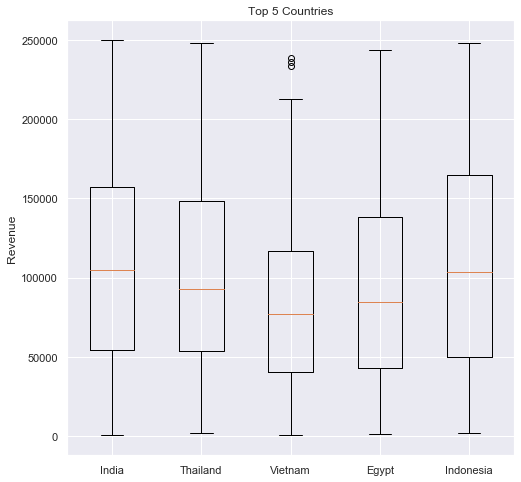

<Figure size 576x576 with 0 Axes>

In [26]:

fig1, ax1 = plt.subplots()

ax1.set_ylabel('Revenue')
labels = ["India","Thailand","Vietnam","Egypt","Indonesia"]
ax1.boxplot(Data,labels=labels)
plt.title("Top 5 Countries")
plt.show()

plt.savefig("../Images/top5bloxplot.png")

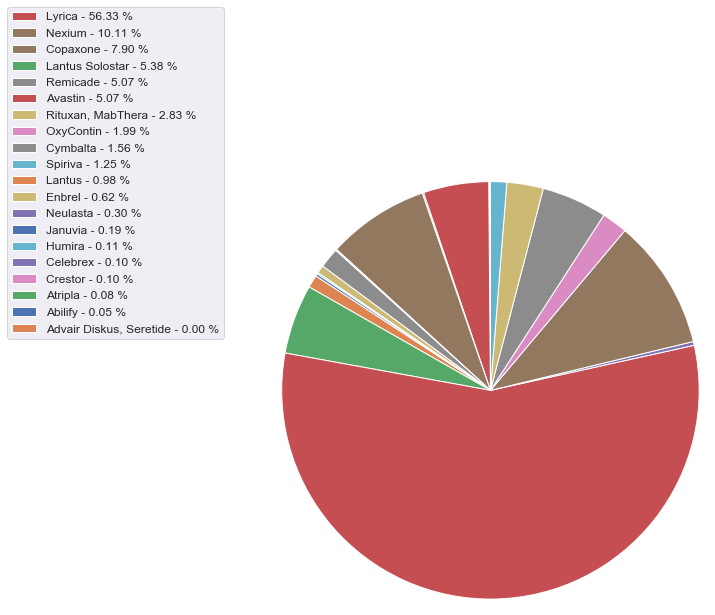

In [25]:
#Revenue based on the drug

drug_grp = df.groupby("Brand Name")
df_drug_grp = pd.DataFrame(drug_grp["Revenue"].sum().rename("Total Per Drug"))

x =df_drug_grp.index
y = df_drug_grp["Total Per Drug"].values

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)



labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
    
plt.legend(patches, labels, loc='right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)
plt.savefig("../Images/brandwiserevenue.png")

In [11]:
#Number of different kinds of drugs that each country is buying.


df_country_group= df.groupby("ship to country")

df_country_Brand= pd.DataFrame(df_country_group["Brand Name"].nunique())
Sum = df_country_Brand.sum()
df_country_Brand["Percent"] = [round(float(brand/Sum)*100,2) for brand in df_country_Brand["Brand Name"]]
df_country_Brand = df_country_Brand.sort_values("Percent",ascending=False)






df_country_Brand


,Brand Name,Percent
ship to country,,
India,16,7.24
Egypt,10,4.52
Malaysia,10,4.52
Vietnam,9,4.07
Syria,9,4.07
Bangladesh,8,3.62
Thailand,8,3.62
Singapore,8,3.62
Netherlands,7,3.17


In [12]:
df_India

,index,Order ID,Generic Name,Brand Name,Company Name,Disease Medical Use,Invoice date,Company code,ship to country,Sold-to party Country Full Name,Delivery Plant,External Agent,Sales quantity,Price TC /Kg,Revenue,External commissions,Months
0,10,CA-2015-011,Pregabalin,Lyrica,Pfizer,Neuropathic pain,2015-11-16,5887,India,India,8095,Not assigned,46,500,23000,0.0,Nov
1,11,CA-2015-012,Pregabalin,Lyrica,Pfizer,Neuropathic pain,2015-09-01,5887,India,India,8095,Not assigned,376,500,188000,0.0,Sep
2,12,CA-2015-013,Pregabalin,Lyrica,Pfizer,Neuropathic pain,2015-07-09,5887,India,India,8095,Not assigned,135,500,67500,0.0,Jul
3,13,CA-2015-014,Pregabalin,Lyrica,Pfizer,Neuropathic pain,2015-07-22,5887,India,India,8095,Not assigned,379,500,189500,0.0,Jul
4,14,CA-2015-015,Pregabalin,Lyrica,Pfizer,Neuropathic pain,2015-10-12,5887,India,India,8095,Not assigned,104,500,52000,0.0,Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,3316,NE-2015-3317,Glatiramer,Copaxone,Generic,Multiple sclerosis,2015-11-29,5704,India,India,8370,Not assigned,109,451,49159,0.0,Nov
1775,3322,RA-2015-3323,Rituximab,"Rituxan, MabThera","Biogen Idec, Chugai Pharmaceutical, Genentech/...",Non-Hodgkin’s lymphoma; rheumatoid arthritis,2015-08-03,5819,India,India,8119,Not assigned,41,364,14924,0.0,Aug
1776,3323,AR-2015-3324,Insulin glargine,Lantus Solostar,Sanofi-Aventis,Diabetes mellitus type 1 and 2,2015-12-18,5653,India,India,7933,Not assigned,42,231,9702,0.0,Dec
1777,3324,UM-2015-3325,Esomeprazole,Nexium,Generic,Gastrointestinal disorders,2015-08-15,5704,India,India,8370,Not assigned,323,366,118218,0.0,Aug


In [14]:
#Lyrica is bought by how many countries

df = df.set_index("Brand Name")
df_Lyrica = df.loc[["Lyrica"]]
df_Lyrica["ship to country"].nunique()

37

,Revenue
ship to country,
Algeria,160308
Argentina,787046
Australia,516557
Bangladesh,2307584
Benin,82929
Cambodia,2080242
Canada,72160
China,120930
Colombia,394914


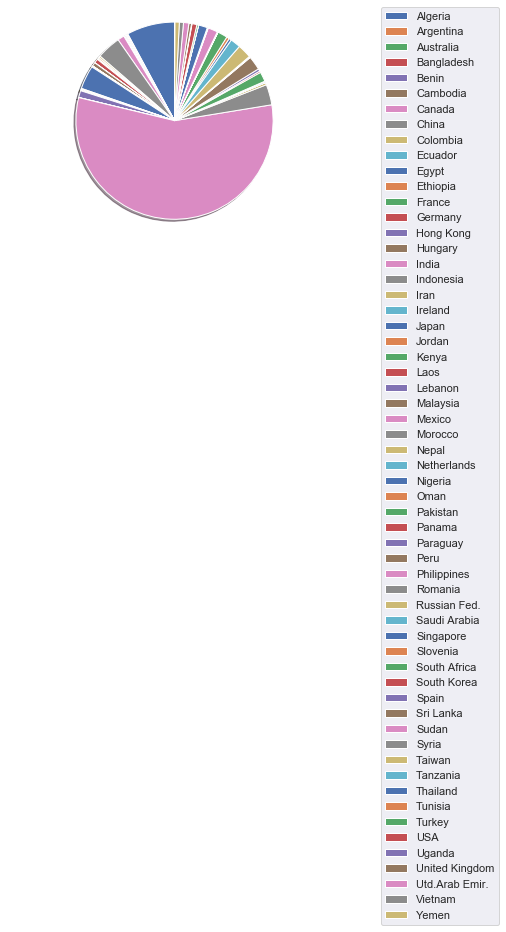

In [15]:
#Pie graph on each countries spending on pharceutical drugs.
df_country_group= df.groupby("ship to country")

df_country= pd.DataFrame(df_country_group["Revenue"].sum())
labels =df_country.index
sizes = df_country["Revenue"].values


plt.pie(sizes , shadow=True, startangle=140)
plt.rcParams["figure.figsize"] = (8, 8)
plt.legend(labels,bbox_to_anchor=(1.1, 1.05))
plt.axis("equal")

df_country

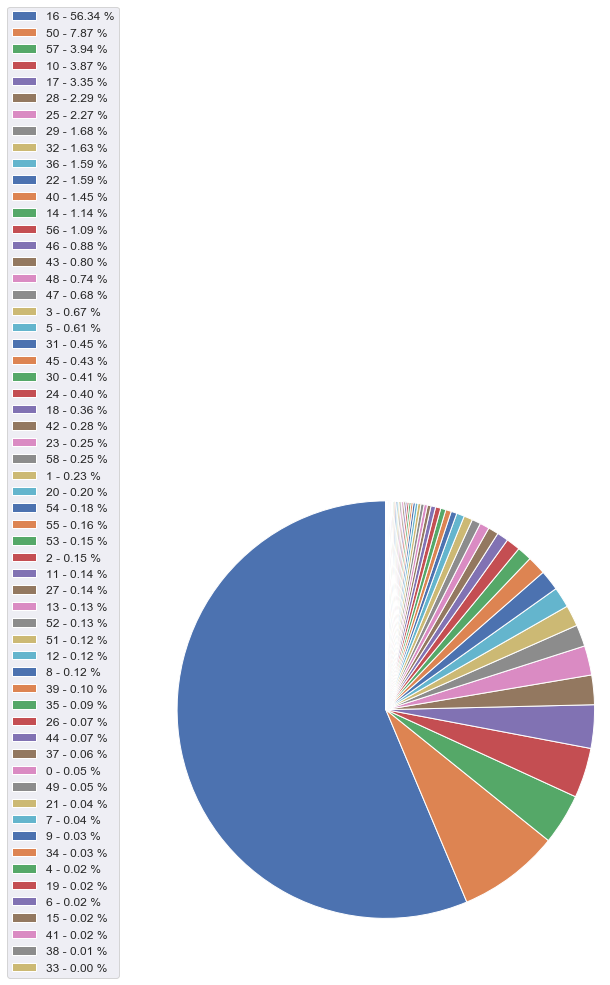

In [24]:
x =df_country.index
y = df_country["Revenue"].values

porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.2)



labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
    
plt.legend(patches, labels, loc='right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)

plt.savefig("../Images/countrywisereve.png")

In [18]:
df_country["Lat"]=""
df_country["Lng"]=""

In [19]:
df_country=df_country.reset_index()
Params = {"key": g_key}

base_url = 'https://maps.googleapis.com/maps/api/geocode/json'


for index,row in df_country.iterrows():
    Params["address"] = row["ship to country"]
    #print(Params)
    
    response = requests.get(base_url,Params)
    response_json = response.json()
    try :
         #print(json.dumps(response_json,indent=4,sort_keys=True))
        df_country.loc[index,"Lat"] = response_json["results"][0]["geometry"]["location"]["lat"]
        df_country.loc[index,"Lng"]=response_json["results"][0]["geometry"]["location"]["lng"]
        print(f" running for the country : {row['ship to country']}")
    except(KeyError, IndexError):
        print("Missing field/result... skipping.")


 running for the country : Algeria
 running for the country : Argentina
 running for the country : Australia
 running for the country : Bangladesh
 running for the country : Benin
 running for the country : Cambodia
 running for the country : Canada
 running for the country : China
 running for the country : Colombia
 running for the country : Ecuador
 running for the country : Egypt
 running for the country : Ethiopia
 running for the country : France
 running for the country : Germany
 running for the country : Hong Kong
 running for the country : Hungary
 running for the country : India
 running for the country : Indonesia
 running for the country : Iran
 running for the country : Ireland
 running for the country : Japan
 running for the country : Jordan
 running for the country : Kenya
 running for the country : Laos
 running for the country : Lebanon
 running for the country : Malaysia
 running for the country : Mexico
 running for the country : Morocco
 running for the country : 

In [20]:
df_country.to_csv("country.csv")
df_country=df_country.sort_values("Revenue",ascending=False)
#df_country=df_country.loc[df_country["ship to country"] != "India"]
df_country
#df_country[["ship to country","Revenue"]].plot(kind="bar")


,ship to country,Revenue,Lat,Lng
16,India,193340264,20.5937,78.9629
50,Thailand,27003115,15.87,100.993
57,Vietnam,13522609,14.0583,108.277
10,Egypt,13278208,26.8206,30.8025
17,Indonesia,11510346,-0.789275,113.921
28,Nepal,7842394,28.3949,84.124
25,Malaysia,7805616,4.21048,101.976
29,Netherlands,5767851,52.1326,5.29127
32,Pakistan,5594622,30.3753,69.3451
36,Philippines,5456271,12.8797,121.774


In [21]:
gmaps.configure(api_key=g_key)

locations = df_country[["Lat","Lng"]]
rating = df_country["Revenue"].astype(float)/1000

fig= gmaps.figure()


#heat_layer = gmaps.heatmap_layer(locations,weights=rating,
#                                  dissipating=False,max_intensity=10,
#                                  point_radius=1)

heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=2700,
                                 point_radius=2)


# Add layer
fig.add_layer(heat_layer)

# Display figure

fig.add_layer(heat_layer)

#print(rating)

fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
#Analysis
#Insigts
#Lyrica is the top drup for more than 30 countries
#Thailand, Vietnam, Egypt , Indonesia are the next top four countries buying drugs from United States.
#Indonesia buying wider range of drugs than India, Thailand, Vietnam and Egypt

#Conclusion 


In [22]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
df_c = pd.read_csv("country.csv")
del df_c["Unnamed: 0"]



info_box_template = """
<dl>
<dt>Country Name</dt><dd>{ship to country}</dd>
<dt>Revenue</dt><dd>{Revenue}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
country_info = [info_box_template.format(**row) for index, row in df_c.iterrows()]
locations = df_c[["Lat", "Lng"]]


In [23]:
df_c = pd.read_csv("country.csv")
#del df_c["Unnamed: 0"]
coordinates = list(zip(df_c["Lat"],df_c["Lng"]))
markers = gmaps.marker_layer(coordinates,info_box_content=country_info)
fig= gmaps.figure()

fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))